<a href="https://colab.research.google.com/github/AshSama12/Anomaly-detection-in-wearing-PPE/blob/master/Untitled25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow
!pip install ultralytics  # For YOLOv8 (if the model uses YOLOv8)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 20.0 MB/s eta 0:00:00


In [ ]:
!pip install inference-sdk


In [ ]:
!pip install inference-sdk
from pycocotools.coco import COCO
from inference_sdk import InferenceHTTPClient
import os

from pycocotools.coco import COCO

# Path to your exported annotation JSON file
ground_truth_path = "/content/drive/MyDrive/Research/_annotations.coco.json"
coco_gt = COCO(ground_truth_path)

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="xv82Gavwdrn9ZZiy62Sc"
)

# Directory of annotated test images
image_dir = "/content/drive/MyDrive/Research/test (1)"
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith((".jpg", ".png"))]

try:
    result = CLIENT.infer(image_path, model_id="helmet-vest-and-boots-detection/8")
    predictions.append(result)
except Exception as e:
    print(f"Error processing {image_path}: {e}")


# Filter out detections of the "person" class
filtered_detections = [detection for detection in result['predictions'] if detection['class'] != "person"]

if 'predictions' in result:
    filtered_detections = [d for d in result['predictions'] if d['class'] != "person"]
else:
    print("No predictions found in result")


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [ ]:
import json
print(json.dumps(filtered_predictions, indent=4))

formatted_predictions = []
for i, prediction in enumerate(filtered_predictions):

        formatted_predictions.append({
            "image_id": i + 1,  # Match with COCO image ID
            "category_id": detection['class'],  # Replace with numerical IDs for classes
            "bbox": [
                detection['x'] - detection['width'] / 2,
                detection['y'] - detection['height'] / 2,
                detection['width'],
                detection['height']
            ],
            "score": detection['confidence']
        })

# Save formatted predictions to a JSON file
with open("predictions.json", "w") as f:
    json.dump(formatted_predictions, f)


[
    {
        "image_id": 1,
        "category_id": "no helmet",
        "bbox": [
            365.0,
            161.0,
            47.0,
            37.0
        ],
        "score": 0.7563907504081726
    },
    {
        "image_id": 1,
        "category_id": "no vest",
        "bbox": [
            378.0,
            185.0,
            76.0,
            64.0
        ],
        "score": 0.7503489255905151
    },
    {
        "image_id": 1,
        "category_id": "person",
        "bbox": [
            215.0,
            156.0,
            141.0,
            147.0
        ],
        "score": 0.7334545850753784
    },
    {
        "image_id": 1,
        "category_id": "no helmet",
        "bbox": [
            281.0,
            166.0,
            52.0,
            37.0
        ],
        "score": 0.7321529984474182
    },
    {
        "image_id": 1,
        "category_id": "vest",
        "bbox": [
            224.0,
            195.0,
            102.0,
            74.0
        ]

[{'x': 321.0, 'y': 331.0, 'width': 248.0, 'height': 354.0, 'confidence': 0.7931722402572632, 'class': 'vest', 'class_id': 6, 'detection_id': 'ba816326-f102-4884-9ef1-865b4d93dbb2'}, {'x': 358.5, 'y': 109.5, 'width': 175.0, 'height': 181.0, 'confidence': 0.7410182952880859, 'class': 'no helmet', 'class_id': 3, 'detection_id': 'd0a779db-2fe0-422f-9143-da6709f43818'}, {'x': 386.5, 'y': 723.5, 'width': 139.0, 'height': 101.0, 'confidence': 0.6191122531890869, 'class': 'boots', 'class_id': 0, 'detection_id': '5e79e4fb-51c0-475c-9d82-dc587d402d21'}]


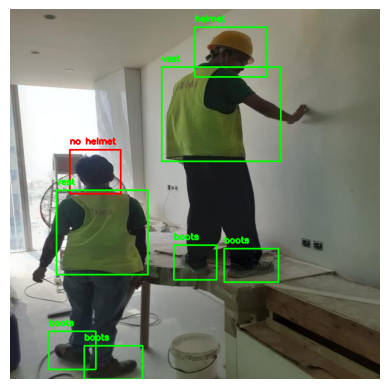

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image with OpenCV
image = cv2.imread(image_path)
for detection in filtered_detections:
    x, y, w, h = detection['x'], detection['y'], detection['width'], detection['height']
    class_name = detection['class']

    # Draw bounding box
    start_point = (int(x - w / 2), int(y - h / 2))
    end_point = (int(x + w / 2), int(y + h / 2))
    color = (0, 255, 0) if class_name in ["helmet", "vest", "boots"] else (0, 0, 255)
    cv2.rectangle(image, start_point, end_point, color, 2)

    # Put label
    cv2.putText(image, class_name, (start_point[0], start_point[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


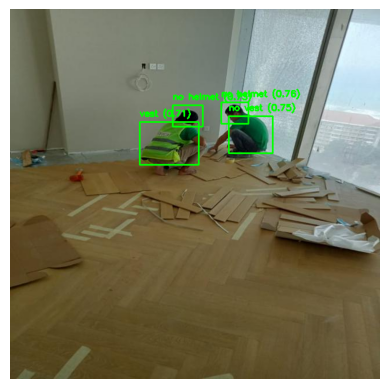

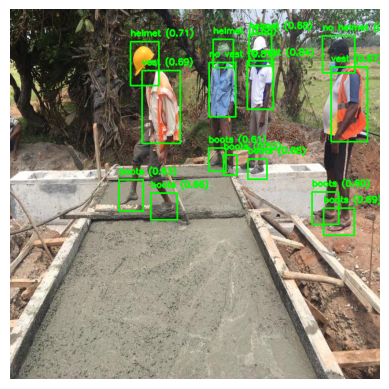

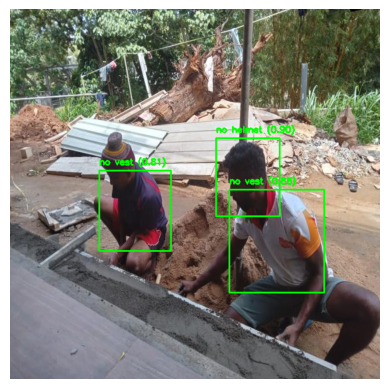

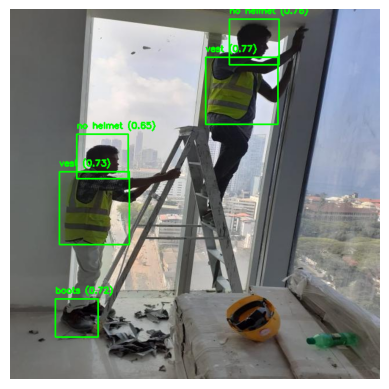

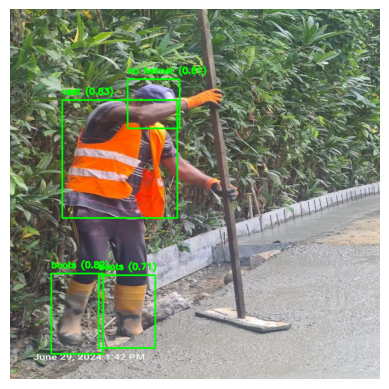

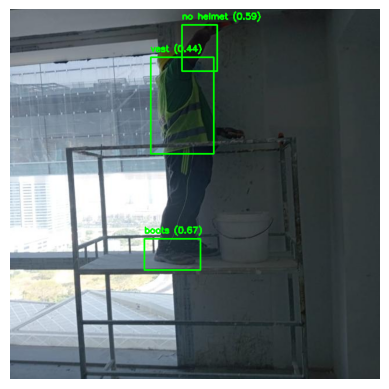

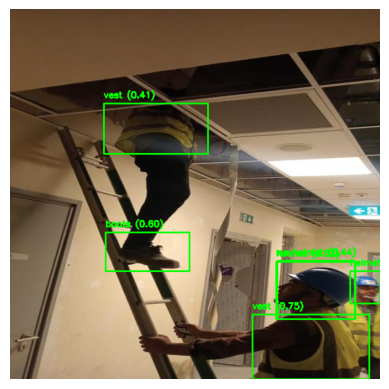

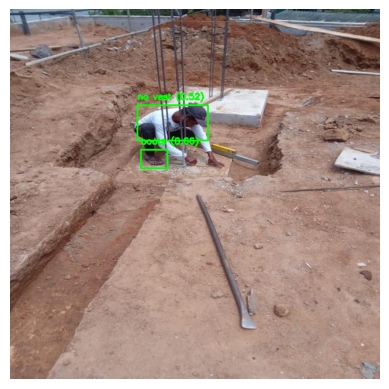

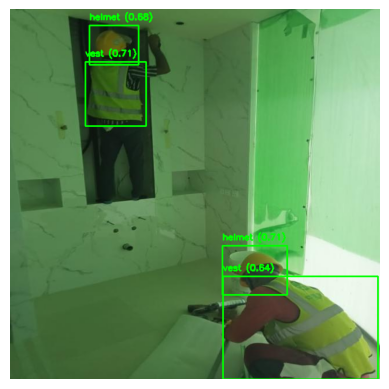

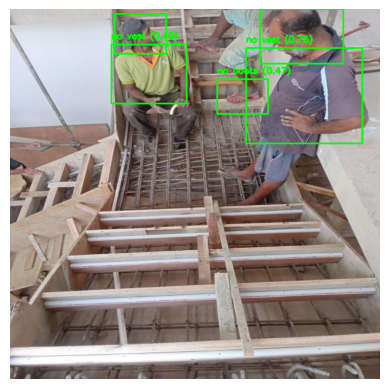

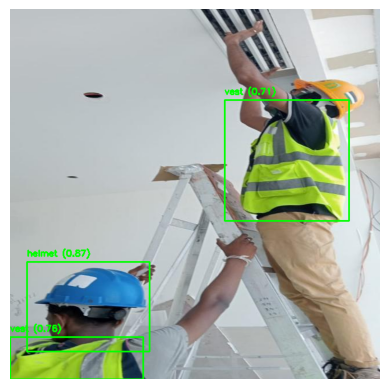

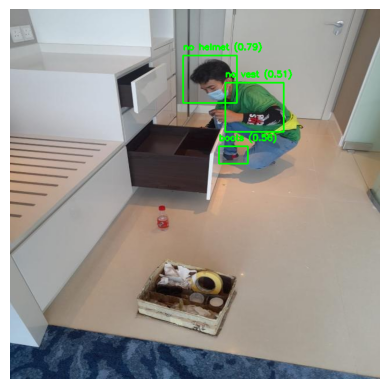

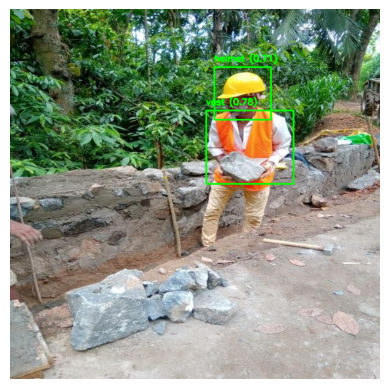

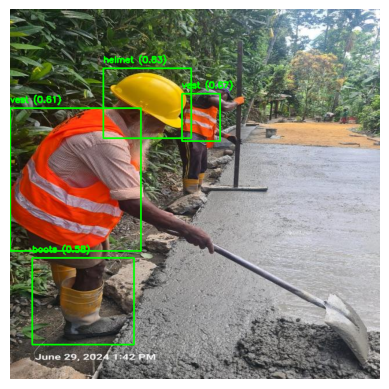

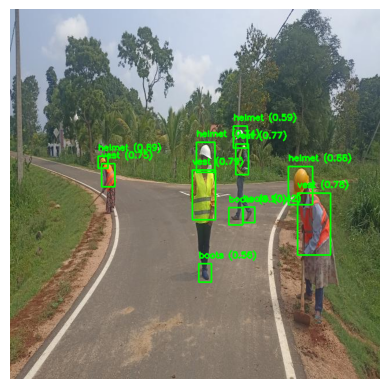

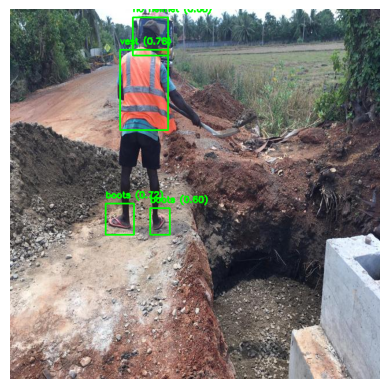

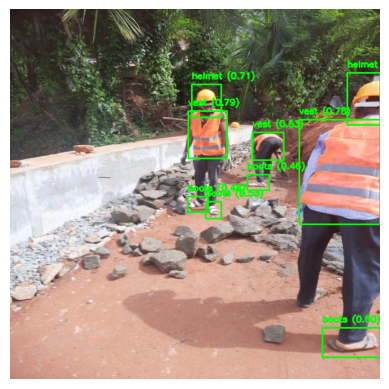

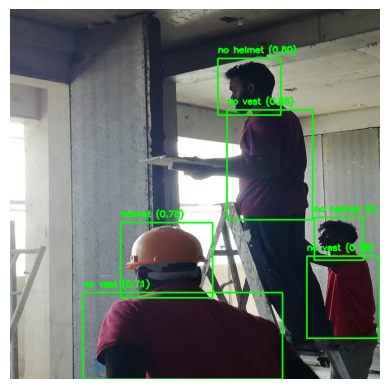

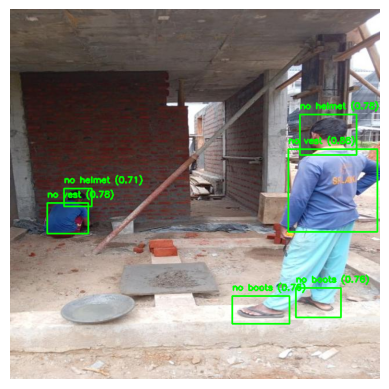

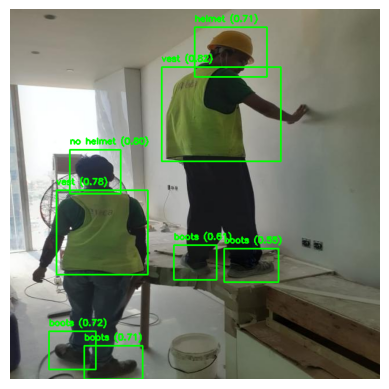

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Assuming image_files is a list of image paths and predictions is a list of prediction dictionaries
for image_path, prediction in zip(image_files, predictions):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        continue

    # Filter out detections of the "person" class
    filtered_detections = [detection for detection in prediction['predictions'] if detection['class'] != "person"]

    for detection in filtered_detections:
        x, y, w, h = detection['x'], detection['y'], detection['width'], detection['height']
        class_name = detection['class']
        confidence = detection['confidence']

        # Draw bounding box
        start_point = (int(x - w / 2), int(y - h / 2))
        end_point = (int(x + w / 2), int(y + h / 2))
        cv2.rectangle(image, start_point, end_point, (0, 255, 0), 2)

        # Put label
        cv2.putText(image, f"{class_name} ({confidence:.2f})", (start_point[0], start_point[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


In [ ]:
# Load ground truth image IDs
ground_truth_ids = set(coco_gt.getImgIds())

# Load predictions
with open(predictions_path, "r") as f:
    predictions = json.load(f)

# Filter predictions
filtered_predictions = [
    pred for pred in predictions if pred["image_id"] in ground_truth_ids
]

# Save filtered predictions
filtered_predictions_path = "/content/filtered_predictions.json"
with open(filtered_predictions_path, "w") as f:
    json.dump(filtered_predictions, f)

print(f"Filtered predictions saved to {filtered_predictions_path}")


TypeError: expected str, bytes or os.PathLike object, not list

In [ ]:
# Map file names to image IDs in the ground truth
image_id_mapping = {img['file_name']: img['id'] for img in coco_gt.loadImgs(coco_gt.getImgIds())}

# Update predictions with the correct mapping
for pred in filtered_predictions:
    if pred['image_id'] in image_id_mapping:
        pred['image_id'] = image_id_mapping[pred['image_id']]

# Save the updated predictions
with open(filtered_predictions_path, "w") as f:
    json.dump(filtered_predictions, f)

print("Updated predictions with consistent image IDs.")


Updated predictions with consistent image IDs.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'y_true' are true labels and 'y_pred' are predicted labels
accuracy = accuracy_score(ground_truth_ids, y_pred)
precision = precision_score(ground_truth_ids, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


NameError: name 'y_pred' is not defined

In [ ]:
# Perform evaluation
coco_eval = COCOeval(coco_gt, coco_dt, iouType='bbox')
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.15s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100